## Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

## Import the dataset

In [2]:
#didnt have to remove 1st column
cluster = pd.read_csv('cluster_data.csv', names = ['sepal-length',
                                              'sepal-width',
                                              'petal-length',
                                              'petal-width'])

## Summarize the data

In [3]:
cluster.head(20)

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
print(cluster.shape)

(156, 4)


In [5]:
print(cluster.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    156.000000   156.000000    156.000000   156.000000
mean       8.169872     4.282692      5.191026     1.691026
std       11.788280     6.263969      8.036733     2.986213
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.350000
75%        6.500000     3.400000      5.200000     1.900000
max       76.000000    42.000000     59.000000    23.000000


In [6]:
print(cluster.dtypes)

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
dtype: object


## Box plots

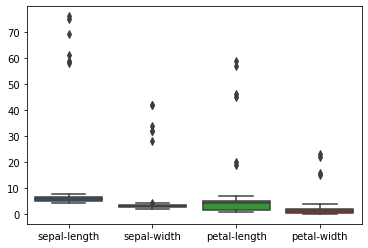

In [7]:
sns.boxplot(data = cluster)

## Clean the data

In [8]:
cluster.drop_duplicates(inplace=True)
std_sl = cluster["sepal-length"].std()

cluster.drop(cluster["sepal-length"].index[
            (cluster["sepal-length"] > cluster["sepal-length"].median() + (std_sl * 2)) &
            (cluster["sepal-length"] > cluster["sepal-length"].median() - (std_sl * 2)) ], inplace=True)
cluster.drop(cluster["sepal-width"].index[
            (cluster["sepal-width"] > cluster["sepal-width"].median() + (std_sl * 2)) &
            (cluster["sepal-width"] > cluster["sepal-width"].median() - (std_sl * 2)) ], inplace=True)
cluster.drop(cluster["petal-length"].index[
            (cluster["petal-length"] > cluster["petal-length"].median() + (std_sl * 2)) &
            (cluster["petal-length"] > cluster["petal-length"].median() - (std_sl * 2)) ], inplace=True)
cluster.drop(cluster["petal-width"].index[
            (cluster["petal-width"] > cluster["petal-width"].median() + (std_sl * 2)) &
            (cluster["petal-width"] > cluster["petal-width"].median() - (std_sl * 2)) ], inplace=True)

## Updated shape and box plots

In [9]:


cluster.head()
cluster.tail()
 value = cluster.unique([cluster['petal-length']])

(147, 4)


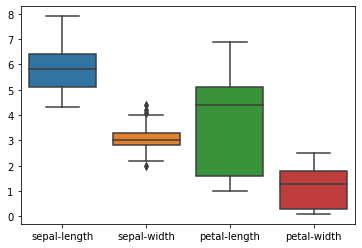

In [10]:
sns.boxplot(data = cluster)

## Visualize the data

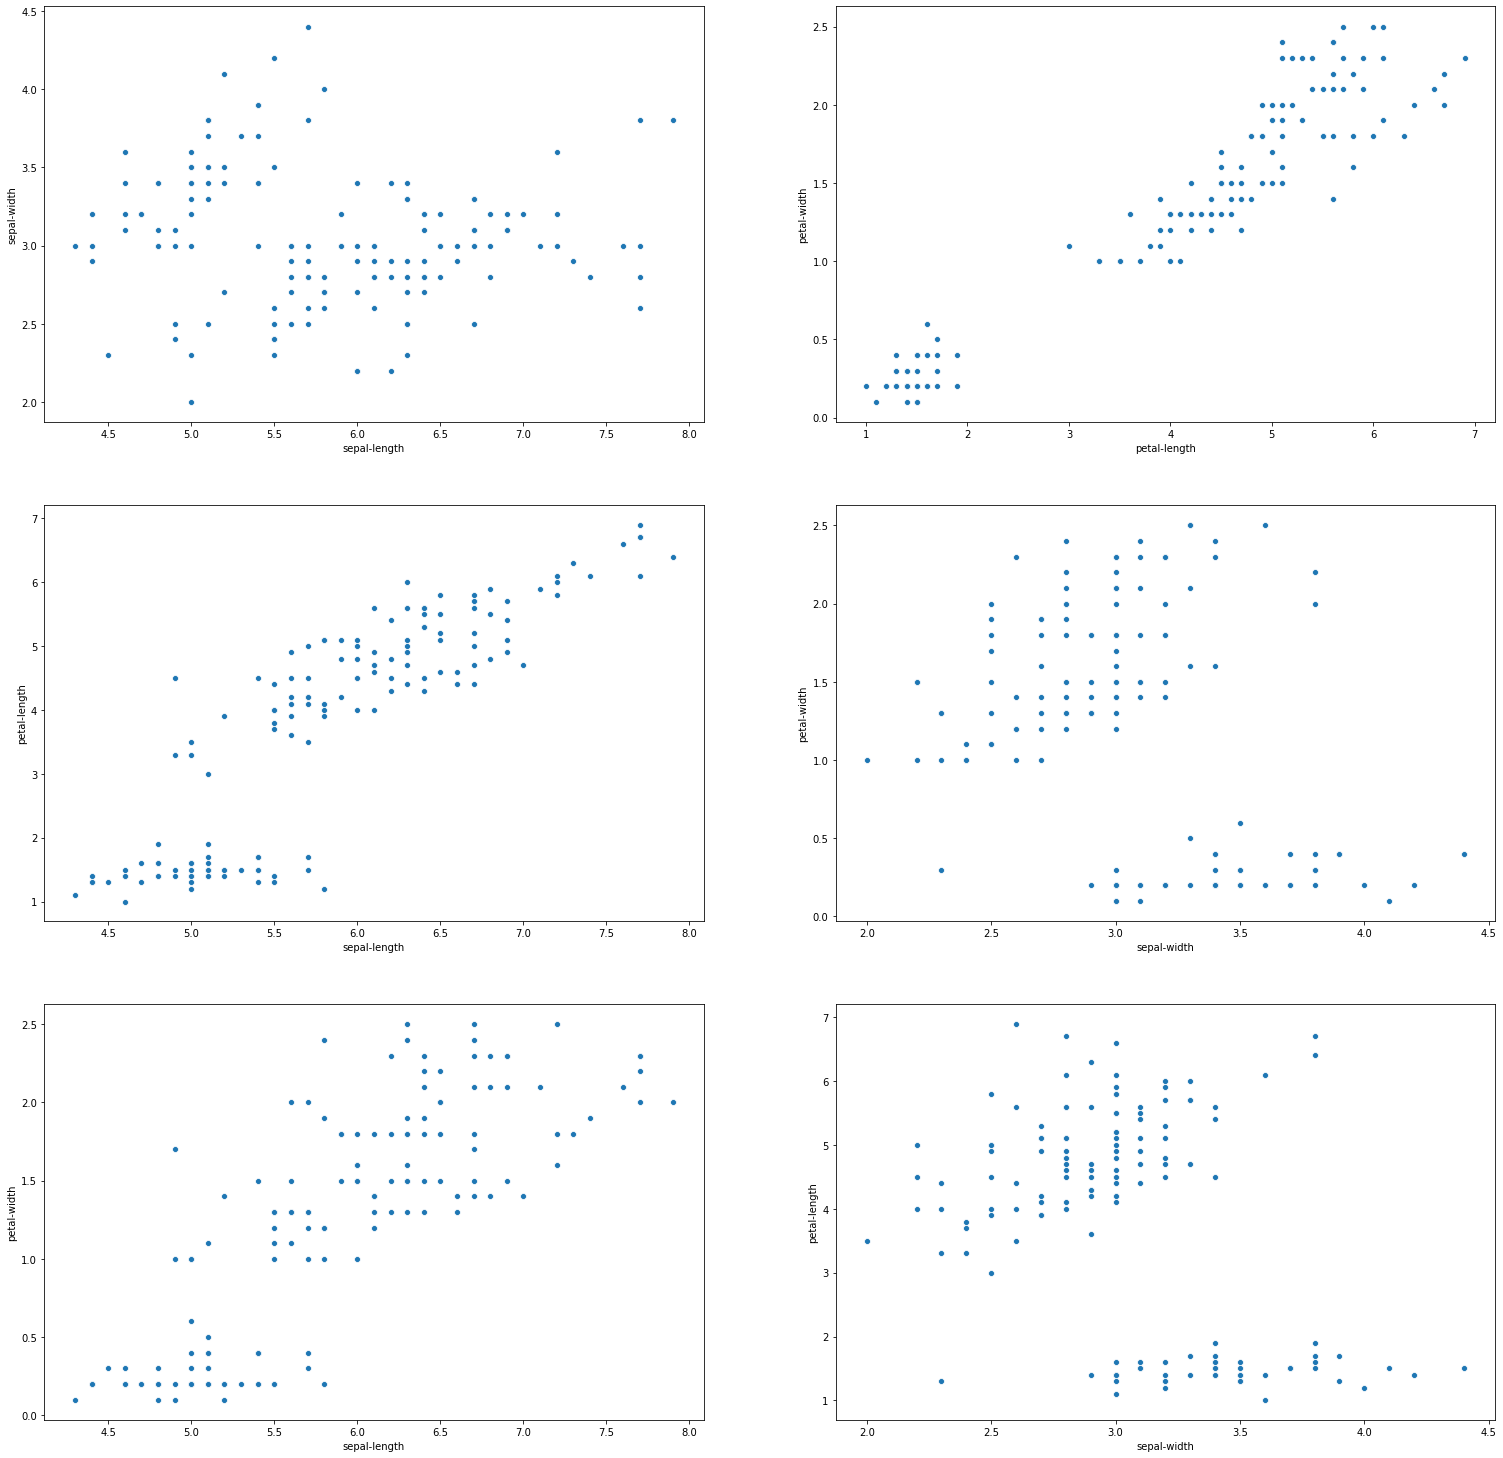

In [11]:
f, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (26, 26))
f.subtitle('The flower', size=50)
sns.scatterplot(data = cluster, x = "sepal-length", y = "sepal-width", ax = axes[0,0])
sns.scatterplot(data = cluster, x = "petal-length", y = "petal-width", ax = axes[0,1])
sns.scatterplot(data = cluster, x = "sepal-length", y = "petal-length", ax = axes[1,0])
sns.scatterplot(data = cluster, x = "sepal-width", y = "petal-width", ax = axes[1,1])
sns.scatterplot(data = cluster, x = "sepal-length", y = "petal-width", ax = axes[2,0])
sns.scatterplot(data = cluster, x = "sepal-width", y = "petal-length", ax = axes[2,1])

## k-Means clustering

In [12]:
X = cluster.iloc[:, 0:4].values

model = KMeans(n_clusters = 3, random_state = 0)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

## Print lables

In [13]:
y = model.labels_
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Re-create plots with clusters

[Text(0, 0.5, 'petal-length'), Text(0.5, 0, 'sepal-width')]

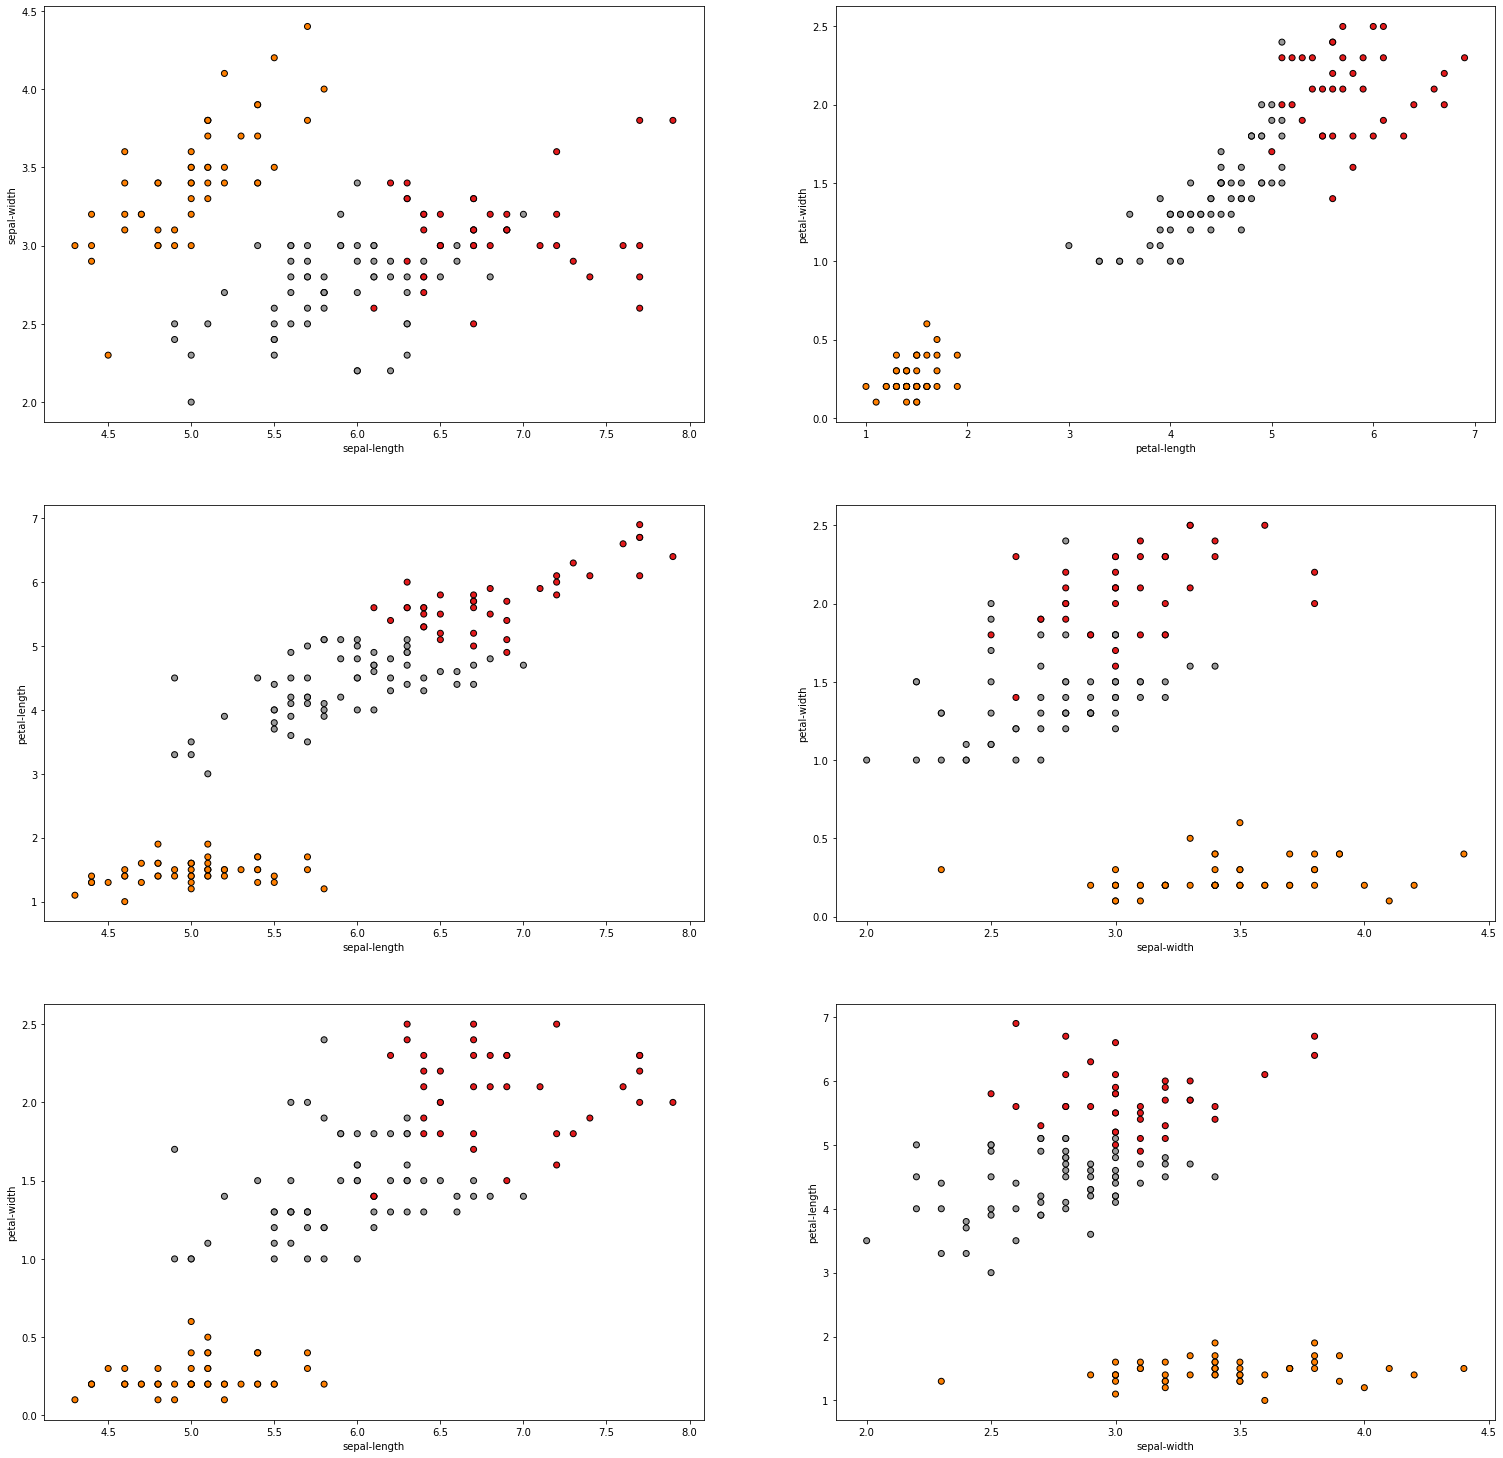

In [14]:
f, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (26, 26))

axes[0,0].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[0,0].set(xlabel='sepal-length', ylabel='sepal-width')

axes[0,1].scatter(X[:, 2], X[:, 3], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[0,1].set(xlabel='petal-length', ylabel='petal-width')

axes[1,0].scatter(X[:, 0], X[:, 2], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[1,0].set(xlabel='sepal-length', ylabel='petal-length')

axes[1,1].scatter(X[:, 1], X[:, 3], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[1,1].set(xlabel='sepal-width', ylabel='petal-width')

axes[2,0].scatter(X[:, 0], X[:, 3], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[2,0].set(xlabel='sepal-length', ylabel='petal-width')

axes[2,1].scatter(X[:, 1], X[:, 2], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[2,1].set(xlabel='sepal-width', ylabel='petal-length')

## New flower

In [15]:
new_flower = np.array([[7, 3, 6, 2]])

y_predict = model.predict(new_flower)
y_predict

array([0], dtype=int32)

## Re-create plots with new flower features

[Text(0, 0.5, 'petal-length'), Text(0.5, 0, 'sepal-width')]

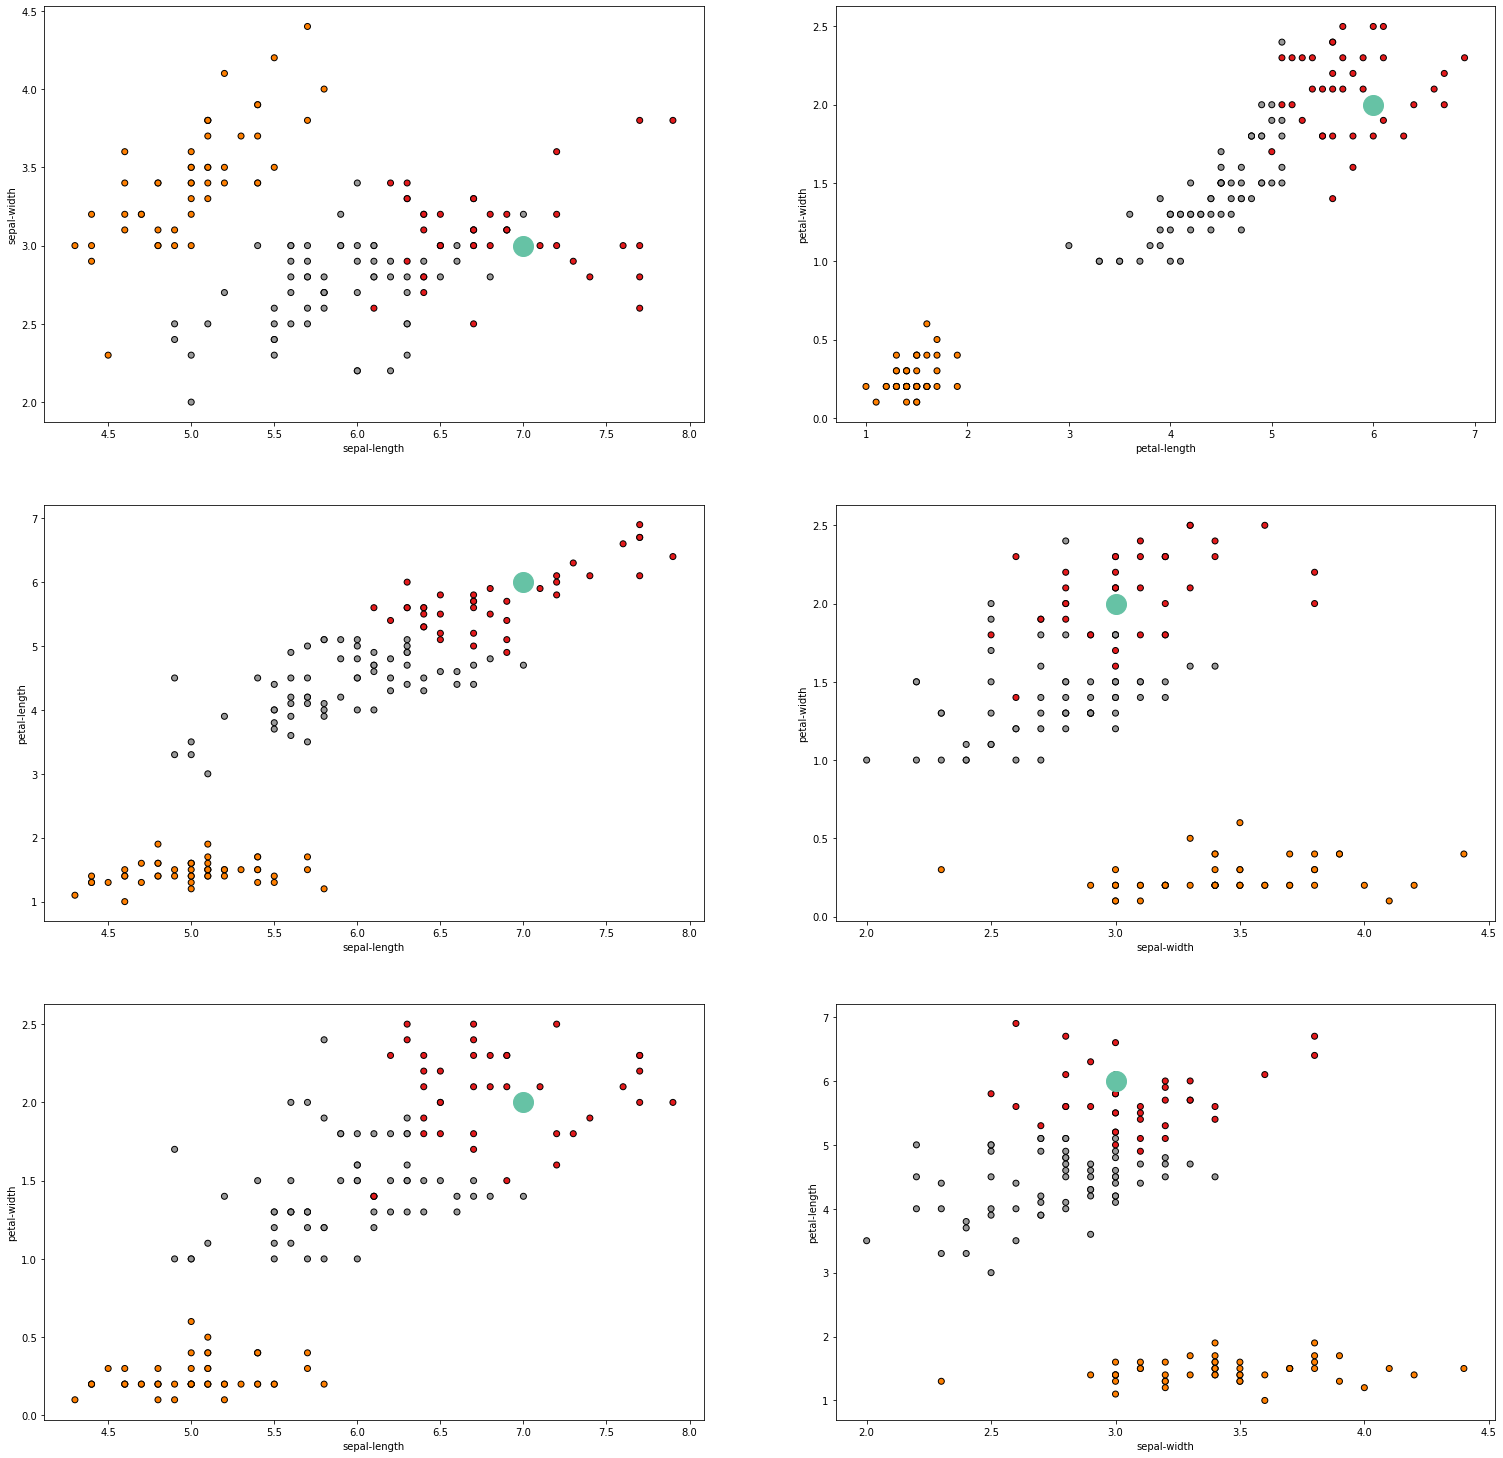

In [17]:
f, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (26, 26))

axes[0,0].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[0,0].scatter(new_flower[:, 0], new_flower[:, 1], c = y_predict, cmap = plt.cm.Set2, s=400)
axes[0,0].set(xlabel='sepal-length', ylabel='sepal-width')
`
axes[0,1].scatter(X[:, 2], X[:, 3], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[0,1].scatter(new_flower[:, 2], new_flower[:, 3], c = y_predict, cmap = plt.cm.Set2, s=400)
axes[0,1].set(xlabel='petal-length', ylabel='petal-width')

axes[1,0].scatter(X[:, 0], X[:, 2], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[1,0].scatter(new_flower[:, 0], new_flower[:, 2], c = y_predict, cmap = plt.cm.Set2, s=400)
axes[1,0].set(xlabel='sepal-length', ylabel='petal-length')

axes[1,1].scatter(X[:, 1], X[:, 3], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[1,1].scatter(new_flower[:, 1], new_flower[:, 3], c = y_predict, cmap = plt.cm.Set2, s=400)
axes[1,1].set(xlabel='sepal-width', ylabel='petal-width')

axes[2,0].scatter(X[:, 0], X[:, 3], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[2,0].scatter(new_flower[:, 0], new_flower[:, 3], c = y_predict, cmap = plt.cm.Set2, s=400)
axes[2,0].set(xlabel='sepal-length', ylabel='petal-width')

axes[2,1].scatter(X[:, 1], X[:, 2], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
axes[2,1].scatter(new_flower[:, 1], new_flower[:, 2], c = y_predict, cmap = plt.cm.Set2, s=400)
axes[2,1].set(xlabel='sepal-width', ylabel='petal-length')

The model predicted correctly.